<a href="https://colab.research.google.com/github/RachanaKC/Data-Science-Project/blob/main/Rachana_Studentperformance_prediction_regression_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
df = pd.DataFrame(pd.read_csv("StudentPerformanceData.csv"))
df

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


In [148]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  500
No of cols =  9


In [149]:
df.describe()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,20.956000,19.876000,74.990380,2.98516
std,144.481833,2.000517,11.471347,14.565917,0.56362
min,1.000000,18.000000,1.000000,50.010000,2.00000
25%,125.750000,19.000000,10.000000,62.607500,2.48750
50%,250.500000,21.000000,20.500000,75.730000,3.00000
75%,375.250000,23.000000,30.000000,87.220000,3.48000
max,500.000000,24.000000,39.000000,99.970000,3.99000


In [150]:
df.isna().sum()

,0
StudentID,0
Gender,0
Age,0
StudyHoursPerWeek,0
AttendanceRate,0
GPA,0
Major,0
PartTimeJob,0
ExtraCurricularActivities,0


In [151]:
df.columns

Index(['StudentID', 'Gender', 'Age', 'StudyHoursPerWeek', 'AttendanceRate',
       'GPA', 'Major', 'PartTimeJob', 'ExtraCurricularActivities'],
      dtype='object')

In [152]:
df.shape

(500, 9)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [154]:
print(len(set(df['PartTimeJob'])))
print(len(set(df['Gender'])))
print(len(set(df['ExtraCurricularActivities'])))

2
2
2


In [155]:
auto=df[['Gender', 'Age', 'StudyHoursPerWeek', 'AttendanceRate',
       'GPA', 'Major', 'PartTimeJob', 'ExtraCurricularActivities']]

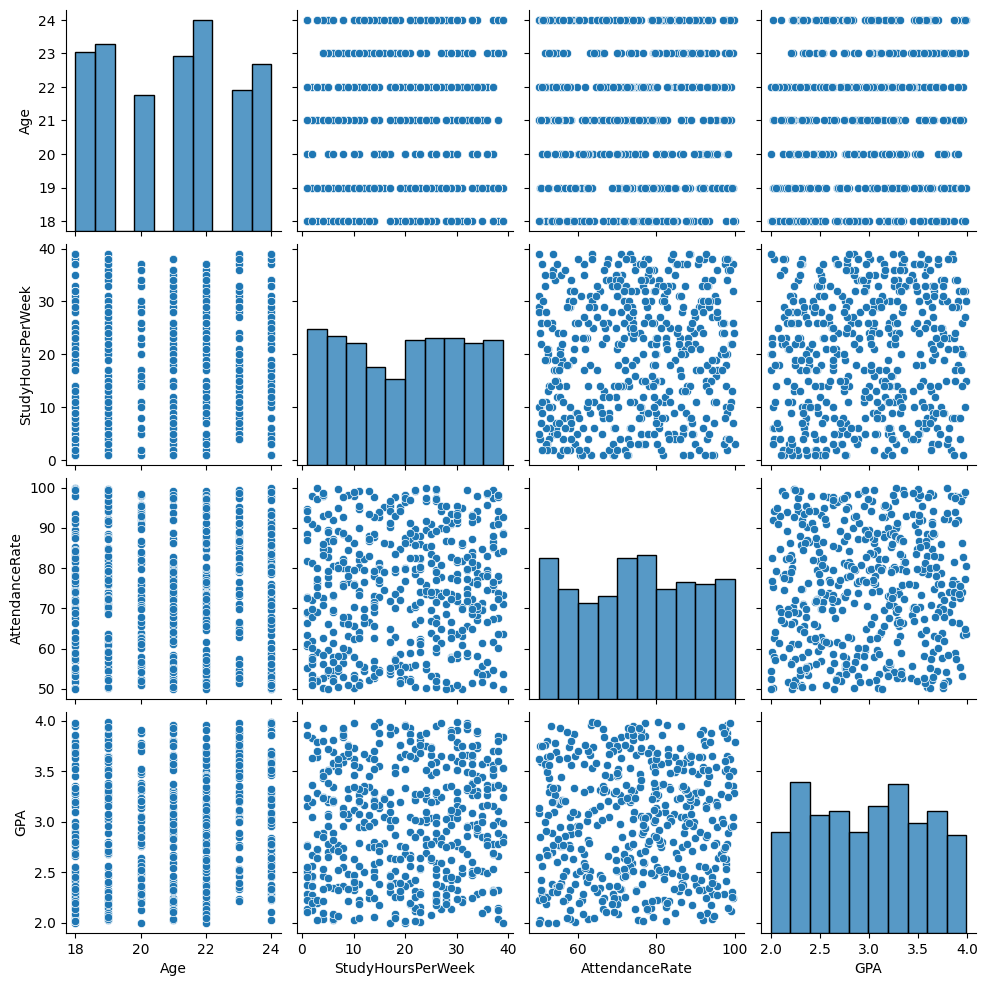

In [156]:
sns.pairplot(auto)

In [157]:
auto1=df[['Age', 'StudyHoursPerWeek', 'AttendanceRate','GPA']]
auto1.corr()

,Age,StudyHoursPerWeek,AttendanceRate,GPA
Age,1.000000,-0.015695,0.037364,0.095805
StudyHoursPerWeek,-0.015695,1.000000,0.095716,0.091700
AttendanceRate,0.037364,0.095716,1.000000,0.060828
GPA,0.095805,0.091700,0.060828,1.000000


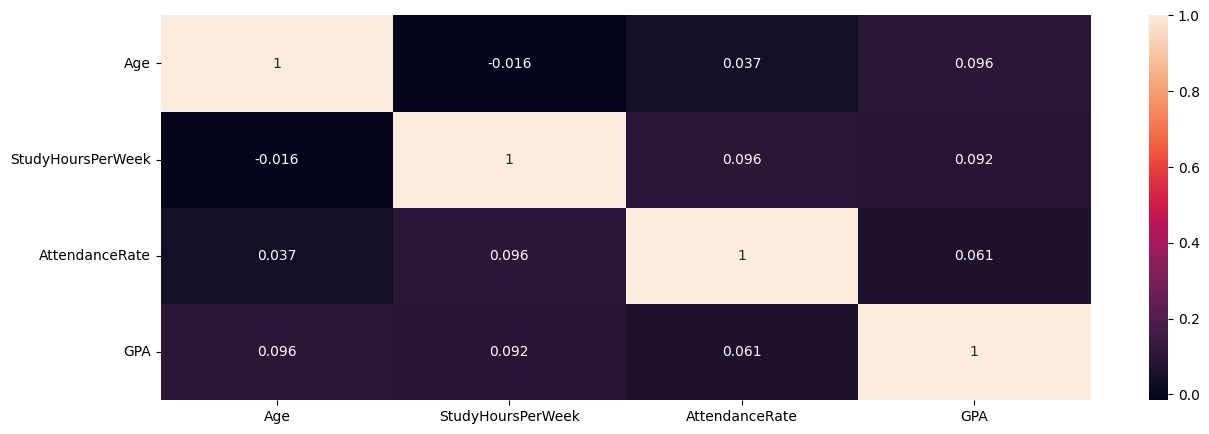

In [158]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(),annot=True)
plt.show()

In [159]:
auto

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No
496,Male,23,11,56.29,3.20,Science,No,No
497,Female,20,6,56.64,3.20,Science,No,Yes
498,Male,22,18,57.18,2.05,Business,No,Yes


In [ ]:
# Dimension reduction

In [160]:
gender = pd.get_dummies(auto['Gender'], drop_first = True)
gender

,Male
0,True
1,False
2,True
3,True
4,True
...,...
495,True
496,True
497,False
498,True


In [161]:
auto = pd.concat([auto, gender], axis = 1)
auto

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities,Male
0,Male,24,37,90.75,3.47,Arts,Yes,No,True
1,Female,22,37,74.90,2.32,Education,No,No,False
2,Male,22,10,53.36,2.38,Business,No,No,True
3,Male,24,10,70.26,3.46,Science,Yes,No,True
4,Male,18,19,74.87,2.31,Education,Yes,No,True
...,...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No,True
496,Male,23,11,56.29,3.20,Science,No,No,True
497,Female,20,6,56.64,3.20,Science,No,Yes,False
498,Male,22,18,57.18,2.05,Business,No,Yes,True


In [162]:
auto = auto.drop(['Gender'],axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities,Male
0,24,37,90.75,3.47,Arts,Yes,No,True
1,22,37,74.90,2.32,Education,No,No,False
2,22,10,53.36,2.38,Business,No,No,True
3,24,10,70.26,3.46,Science,Yes,No,True
4,18,19,74.87,2.31,Education,Yes,No,True
...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,No,No,True
496,23,11,56.29,3.20,Science,No,No,True
497,20,6,56.64,3.20,Science,No,Yes,False
498,22,18,57.18,2.05,Business,No,Yes,True


In [163]:
partjob = pd.get_dummies(auto['PartTimeJob'], drop_first =True)
partjob

,Yes
0,True
1,False
2,False
3,True
4,True
...,...
495,False
496,False
497,False
498,False


In [164]:
auto = pd.concat([auto,partjob], axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities,Male,Yes
0,24,37,90.75,3.47,Arts,Yes,No,True,True
1,22,37,74.90,2.32,Education,No,No,False,False
2,22,10,53.36,2.38,Business,No,No,True,False
3,24,10,70.26,3.46,Science,Yes,No,True,True
4,18,19,74.87,2.31,Education,Yes,No,True,True
...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,No,No,True,False
496,23,11,56.29,3.20,Science,No,No,True,False
497,20,6,56.64,3.20,Science,No,Yes,False,False
498,22,18,57.18,2.05,Business,No,Yes,True,False


In [166]:
auto = auto.drop(['PartTimeJob'],axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,ExtraCurricularActivities,Male,Yes
0,24,37,90.75,3.47,Arts,No,True,True
1,22,37,74.90,2.32,Education,No,False,False
2,22,10,53.36,2.38,Business,No,True,False
3,24,10,70.26,3.46,Science,No,True,True
4,18,19,74.87,2.31,Education,No,True,True
...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,No,True,False
496,23,11,56.29,3.20,Science,No,True,False
497,20,6,56.64,3.20,Science,Yes,False,False
498,22,18,57.18,2.05,Business,Yes,True,False


In [167]:
auto = auto.rename(columns={'Yes': 'PartTimeJob'})
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,ExtraCurricularActivities,Male,PartTimeJob
0,24,37,90.75,3.47,Arts,No,True,True
1,22,37,74.90,2.32,Education,No,False,False
2,22,10,53.36,2.38,Business,No,True,False
3,24,10,70.26,3.46,Science,No,True,True
4,18,19,74.87,2.31,Education,No,True,True
...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,No,True,False
496,23,11,56.29,3.20,Science,No,True,False
497,20,6,56.64,3.20,Science,Yes,False,False
498,22,18,57.18,2.05,Business,Yes,True,False


In [168]:
ExtraAct = pd.get_dummies(auto['ExtraCurricularActivities'], drop_first = True)
ExtraAct

,Yes
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,True
498,True


In [169]:
auto = pd.concat([auto,ExtraAct], axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,ExtraCurricularActivities,Male,PartTimeJob,Yes
0,24,37,90.75,3.47,Arts,No,True,True,False
1,22,37,74.90,2.32,Education,No,False,False,False
2,22,10,53.36,2.38,Business,No,True,False,False
3,24,10,70.26,3.46,Science,No,True,True,False
4,18,19,74.87,2.31,Education,No,True,True,False
...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,No,True,False,False
496,23,11,56.29,3.20,Science,No,True,False,False
497,20,6,56.64,3.20,Science,Yes,False,False,True
498,22,18,57.18,2.05,Business,Yes,True,False,True


In [170]:
auto = auto.drop(['ExtraCurricularActivities'],axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,Male,PartTimeJob,Yes
0,24,37,90.75,3.47,Arts,True,True,False
1,22,37,74.90,2.32,Education,False,False,False
2,22,10,53.36,2.38,Business,True,False,False
3,24,10,70.26,3.46,Science,True,True,False
4,18,19,74.87,2.31,Education,True,True,False
...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,True,False,False
496,23,11,56.29,3.20,Science,True,False,False
497,20,6,56.64,3.20,Science,False,False,True
498,22,18,57.18,2.05,Business,True,False,True


In [171]:
auto = auto.rename(columns={'Yes': 'ExtraAct'})
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,Male,PartTimeJob,ExtraAct
0,24,37,90.75,3.47,Arts,True,True,False
1,22,37,74.90,2.32,Education,False,False,False
2,22,10,53.36,2.38,Business,True,False,False
3,24,10,70.26,3.46,Science,True,True,False
4,18,19,74.87,2.31,Education,True,True,False
...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,True,False,False
496,23,11,56.29,3.20,Science,True,False,False
497,20,6,56.64,3.20,Science,False,False,True
498,22,18,57.18,2.05,Business,True,False,True


In [172]:
major= pd.get_dummies(auto['Major'], drop_first = False)
major

,Arts,Business,Education,Engineering,Science
0,True,False,False,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,False,False,False,True
4,False,False,True,False,False
...,...,...,...,...,...
495,False,False,False,False,True
496,False,False,False,False,True
497,False,False,False,False,True
498,False,True,False,False,False


In [173]:
auto = pd.concat([auto,major], axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,Male,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,37,90.75,3.47,Arts,True,True,False,True,False,False,False,False
1,22,37,74.90,2.32,Education,False,False,False,False,False,True,False,False
2,22,10,53.36,2.38,Business,True,False,False,False,True,False,False,False
3,24,10,70.26,3.46,Science,True,True,False,False,False,False,False,True
4,18,19,74.87,2.31,Education,True,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,Science,True,False,False,False,False,False,False,True
496,23,11,56.29,3.20,Science,True,False,False,False,False,False,False,True
497,20,6,56.64,3.20,Science,False,False,True,False,False,False,False,True
498,22,18,57.18,2.05,Business,True,False,True,False,True,False,False,False


In [174]:
auto = auto.drop(['Major'],axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Male,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,37,90.75,3.47,True,True,False,True,False,False,False,False
1,22,37,74.90,2.32,False,False,False,False,False,True,False,False
2,22,10,53.36,2.38,True,False,False,False,True,False,False,False
3,24,10,70.26,3.46,True,True,False,False,False,False,False,True
4,18,19,74.87,2.31,True,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,True,False,False,False,False,False,False,True
496,23,11,56.29,3.20,True,False,False,False,False,False,False,True
497,20,6,56.64,3.20,False,False,True,False,False,False,False,True
498,22,18,57.18,2.05,True,False,True,False,True,False,False,False


In [175]:
auto.corr()

,Age,StudyHoursPerWeek,AttendanceRate,GPA,Male,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
Age,1.000000,-0.015695,0.037364,0.095805,0.081556,-0.028511,0.011137,-0.046535,-0.023815,-0.022099,0.064947,0.028717
StudyHoursPerWeek,-0.015695,1.000000,0.095716,0.091700,-0.013178,-0.010767,0.003409,-0.015969,0.038743,0.045030,-0.017535,-0.055736
AttendanceRate,0.037364,0.095716,1.000000,0.060828,-0.065842,-0.026235,0.023469,-0.023114,0.011423,0.033539,0.033138,-0.061350
GPA,0.095805,0.091700,0.060828,1.000000,-0.018540,0.040436,0.039115,0.019483,0.049036,-0.040337,-0.011549,-0.020858
Male,0.081556,-0.013178,-0.065842,-0.018540,1.000000,0.009756,-0.065031,-0.038011,0.013047,0.087667,-0.040623,-0.022265
PartTimeJob,-0.028511,-0.010767,-0.026235,0.040436,0.009756,1.000000,0.018944,0.004010,0.008565,0.020365,-0.004118,-0.031505
ExtraAct,0.011137,0.003409,0.023469,0.039115,-0.065031,0.018944,1.000000,0.070056,-0.016412,-0.096783,-0.012798,0.061150
Arts,-0.046535,-0.015969,-0.023114,0.019483,-0.038011,0.004010,0.070056,1.000000,-0.271724,-0.245303,-0.263994,-0.218218
Business,-0.023815,0.038743,0.011423,0.049036,0.013047,0.008565,-0.016412,-0.271724,1.000000,-0.266620,-0.286935,-0.237181
Education,-0.022099,0.045030,0.033539,-0.040337,0.087667,0.020365,-0.096783,-0.245303,-0.266620,1.000000,-0.259035,-0.214118


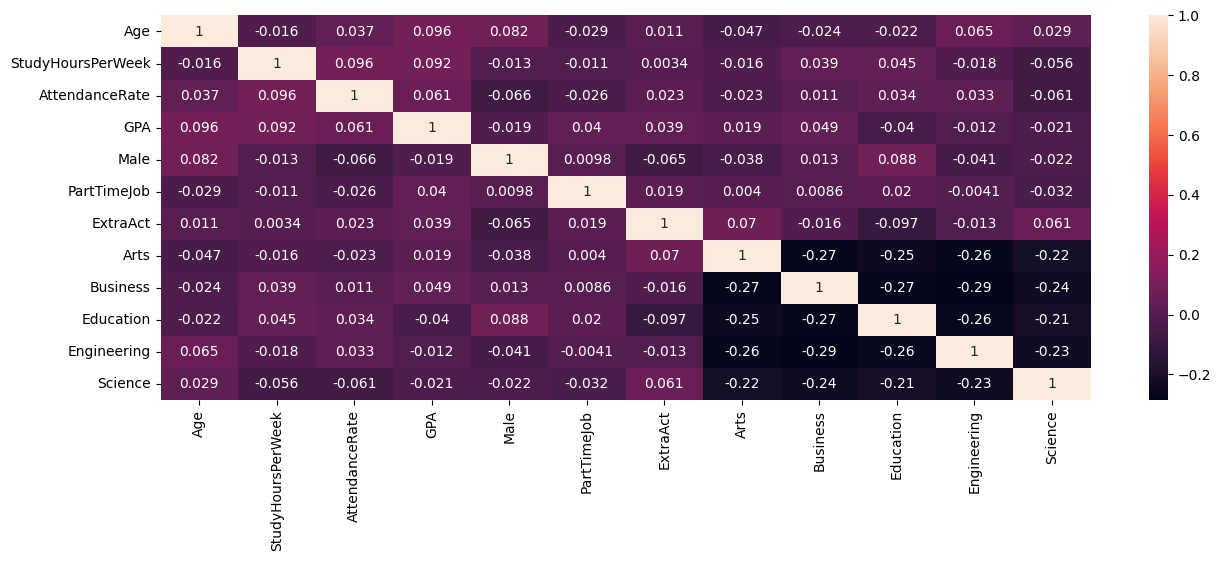

In [176]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [177]:
auto = auto.drop(['Male'],axis = 1)
auto

,Age,StudyHoursPerWeek,AttendanceRate,GPA,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,37,90.75,3.47,True,False,True,False,False,False,False
1,22,37,74.90,2.32,False,False,False,False,True,False,False
2,22,10,53.36,2.38,False,False,False,True,False,False,False
3,24,10,70.26,3.46,True,False,False,False,False,False,True
4,18,19,74.87,2.31,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,2.97,False,False,False,False,False,False,True
496,23,11,56.29,3.20,False,False,False,False,False,False,True
497,20,6,56.64,3.20,False,True,False,False,False,False,True
498,22,18,57.18,2.05,False,True,False,True,False,False,False


In [179]:
auto['GPA']=df['GPA'].astype(str).str.replace('.','')
auto['GPA']=df['GPA'].astype(str).str.replace("'",'')
auto


,Age,StudyHoursPerWeek,AttendanceRate,GPA,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,37,90.75,347,True,False,True,False,False,False,False
1,22,37,74.90,232,False,False,False,False,True,False,False
2,22,10,53.36,238,False,False,False,True,False,False,False
3,24,10,70.26,346,True,False,False,False,False,False,True
4,18,19,74.87,231,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,297,False,False,False,False,False,False,True
496,23,11,56.29,32,False,False,False,False,False,False,True
497,20,6,56.64,32,False,True,False,False,False,False,True
498,22,18,57.18,205,False,True,False,True,False,False,False


In [180]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [181]:
df_train.shape

(425, 11)

In [182]:
df_test.shape

(75, 11)

In [183]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['Age','StudyHoursPerWeek','AttendanceRate','PartTimeJob','ExtraAct','Arts','Business','Education','Engineering','Science']]

y_train = df_train['GPA'].astype(int)
# df_test_predict = X_train.iloc[0:1]
# for linear regression
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

# # #for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)

# # #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# model.predict(df_test_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearRegression()

In [184]:
# #Creating pickle file
import pickle
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [185]:
#training acc
print("Linear regression = ",lr_model.score(X_train, y_train)*100)
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)



Linear regression =  1.9460084376210718
Logistic regression =  7.0588235294117645
Polynomial regression =  100.0


In [186]:
X_test = df_test
y_test = auto['GPA'].astype('int')
X_test = auto.drop(['GPA'],axis = 1)

In [187]:
X_test

,Age,StudyHoursPerWeek,AttendanceRate,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,37,90.75,True,False,True,False,False,False,False
1,22,37,74.90,False,False,False,False,True,False,False
2,22,10,53.36,False,False,False,True,False,False,False
3,24,10,70.26,True,False,False,False,False,False,True
4,18,19,74.87,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
495,22,37,76.61,False,False,False,False,False,False,True
496,23,11,56.29,False,False,False,False,False,False,True
497,20,6,56.64,False,True,False,False,False,False,True
498,22,18,57.18,False,True,False,True,False,False,False


In [188]:
y_test

,GPA
0,347
1,232
2,238
3,346
4,231
...,...
495,297
496,32
497,32
498,205


In [189]:
#test acc
print("Linear regression = ",lr_model.score(X_test, y_test)*100)
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_test), y_test)*100)



Linear regression =  0.5423109547989524
Logistic regression =  6.0
Polynomial regression =  -16014.968807041912


In [190]:
data = df_test.iloc[21:22].astype('int')
data

,Age,StudyHoursPerWeek,AttendanceRate,GPA,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
312,24,27,73,324,0,0,0,1,0,0,0


In [191]:
actual_GPA = data['GPA']
data = data.drop(['GPA'],axis = 1)
data

,Age,StudyHoursPerWeek,AttendanceRate,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
312,24,27,73,0,0,0,1,0,0,0


In [192]:
print("Predicted GPA using linear regression",lr_model.predict(data))
print("Predicted GPA using logistic regression",lg_model.predict(data))
print("Predicted  GPA using Polynomial regression",pol_reg.predict(poly_reg.fit_transform(data)))

print("GPA",actual_GPA)

Predicted GPA using linear regression [273.43745881]
Predicted GPA using logistic regression [376]
Predicted  GPA using Polynomial regression [-460.67985762]
GPA 312    324
Name: GPA, dtype: int64


In [193]:
actual_GPA

,GPA
312,324


In [194]:
data = {'Age':[int(input("Enter age = ")) for i in range(1)],
        'StudyHoursPerWeek':[float(input("Study Hours per Week = ")) for i in range(1)],
        'AttendanceRate':[float(input("Attendance Rate= ")) for i in range(1)],
        'PartTimeJob':[int(input("Part time job ? Enter 1 or 0 = ")) for i in range(1)],
        'ExtraAct':[int(input("Extra Activities ? Enter 1 or 0 = ")) for i in range(1)],
        'Arts':[int(input("Arts? Enter 1 or 0 = ")) for i in range(1)],
        'Business':[int(input("Business? Enter 1 or 0 = ")) for i in range(1)],
        'Education':[int(input("Education? Enter 1 or 0 = ")) for i in range(1)],
        'Engineering':[int(input("Engineering? Enter 1 or 0 = ")) for i in range(1)],
        'Science':[int(input("Science0? Enter 1 or 0 = ")) for i in range(1)]}

df = pd.DataFrame(data)

df

Enter age = 24
Study Hours per Week = 27
Attendance Rate= 73
Part time job ? Enter 1 or 0 = 0
Extra Activities ? Enter 1 or 0 = 0
Arts? Enter 1 or 0 = 0
Business? Enter 1 or 0 = 1
Education? Enter 1 or 0 = 0
Engineering? Enter 1 or 0 = 0
Science0? Enter 1 or 0 = 0


,Age,StudyHoursPerWeek,AttendanceRate,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,27.0,73.0,0,0,0,1,0,0,0


In [195]:

predicted_GPA = lr_model.predict(df)

print("predicted GPA",predicted_GPA)

predicted GPA [273.43745881]


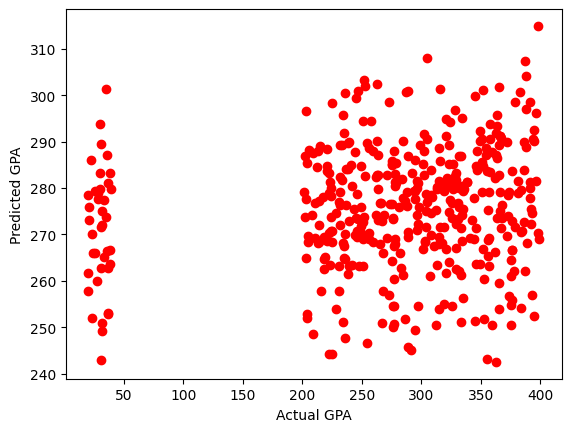

In [196]:
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.show()

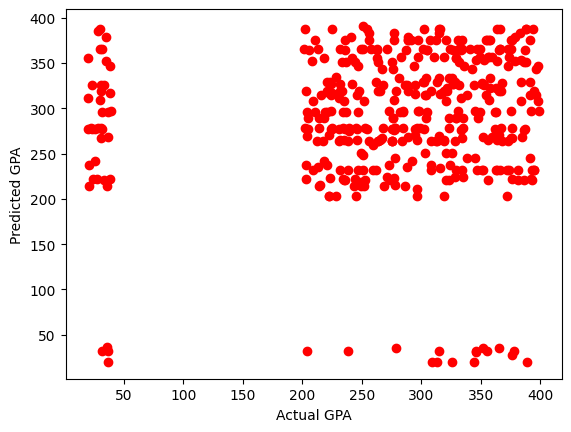

In [197]:
plt.scatter(y_train,lg_model.predict(X_train),color = 'red')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.show()

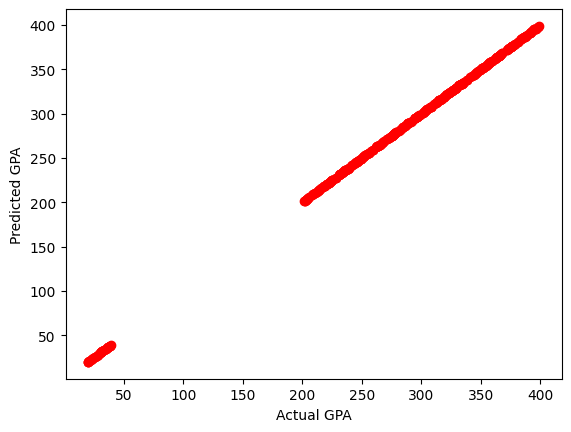

In [198]:
plt.scatter(y_train,pol_reg.predict(poly_reg.fit_transform(X_train)),color = 'red')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.show()

In [210]:
import pickle as pk
#to save model
filename = 'model.pickle'
pk.dump(pol_reg, open(filename, 'wb'))

In [211]:
import pickle as pk
import pandas as pd
#to save model
filename = 'model.pickle'
#load the model
loaded_model = pk.load(open(filename, 'rb'))
# print("Polynomial regression = ",loaded_model.score(poly_reg.fit_transform(X_train), y_train)*100)

data = {'Age':[int(input("Enter age = ")) for i in range(1)],
        'StudyHoursPerWeek':[float(input("Study Hours per Week = ")) for i in range(1)],
        'AttendanceRate':[float(input("Attendance Rate= ")) for i in range(1)],
        'PartTimeJob':[int(input("Part time job ? Enter 1 or 0 = ")) for i in range(1)],
        'ExtraAct':[int(input("Extra Activities ? Enter 1 or 0 = ")) for i in range(1)],
        'Arts':[int(input("Arts? Enter 1 or 0 = ")) for i in range(1)],
        'Business':[int(input("Business? Enter 1 or 0 = ")) for i in range(1)],
        'Education':[int(input("Education? Enter 1 or 0 = ")) for i in range(1)],
        'Engineering':[int(input("Engineering? Enter 1 or 0 = ")) for i in range(1)],
        'Science':[int(input("Science? Enter 1 or 0 = ")) for i in range(1)]}
df = pd.DataFrame(data)
predicted_GPA = loaded_model.predict(poly_reg.fit_transform(df))
print("predicted GPA",predicted_GPA)
df

Enter age = 24
Study Hours per Week = 27
Attendance Rate= 73
Part time job ? Enter 1 or 0 = 0
Extra Activities ? Enter 1 or 0 = 0
Arts? Enter 1 or 0 = 0
Business? Enter 1 or 0 = 1
Education? Enter 1 or 0 = 0
Engineering? Enter 1 or 0 = 0
Science? Enter 1 or 0 = 0
predicted GPA [-460.67985762]


,Age,StudyHoursPerWeek,AttendanceRate,PartTimeJob,ExtraAct,Arts,Business,Education,Engineering,Science
0,24,27.0,73.0,0,0,0,1,0,0,0
